In [26]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np 
import sklearn

In [2]:
import skillsnetwork
#you will need to download the dataset; if you are running locally, please comment out the following 
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv','module_5_auto.csv')


Saved as 'module_5_auto.csv'


In [3]:
df = pd.read_csv("module_5_auto.csv", header=0)

df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
# obtain only numeric data from the dataset using python ?

df_numeric = df.select_dtypes(["int64", "float64"])


In [10]:
# remove unnamed columns 

df_numeric.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace= True)

In [12]:
#Libraries for plotting 
from ipywidgets import interact, interactive, fixed, interact_manual


Functions for plotting 

In [13]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [14]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Train and test

In [15]:
y_data = df["price"]

x_data = df.drop(["price"], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("number of test samples ", x_test.shape[0])
print("number of train samples ", x_train.shape[0])

number of test samples  81
number of train samples  120


In [18]:
# import linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr

LinearRegression()

In [19]:
lr.fit(x_train[["horsepower"]],y_train)

LinearRegression()

In [20]:
# calculate the R2 on the test set 
lr.score(x_test[['horsepower']], y_test)



0.7139364665406973

In [21]:
lr.score(x_train[['horsepower']], y_train)

0.5754067463583004

###  Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lr , x_data[["horsepower"]], y_data, cv=4)

In [23]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [24]:
print(("mean : ",Rcross.mean()) , "standard deviation ", Rcross.std())

('mean : ', 0.522009915042119) standard deviation  0.291183944475603


In [25]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lr,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]


array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Complete step by step process

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [47]:
df_numeric.isnull().sum()



symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
dtype: int64

In [46]:
df_numeric_mean= df_numeric["stroke"].astype("float").mean()

df_numeric["stroke"].replace(np.nan , df_numeric_mean)






0      3.256904
1      3.256904
2      3.256904
3      3.256904
4      3.256904
         ...   
196    3.256904
197    3.256904
198    3.256904
199    3.256904
200    3.256904
Name: stroke, Length: 201, dtype: float64

In [48]:
data = df_numeric
X = data.drop('price', axis=1)
y = data['price']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")


Linear Regression Model:
Mean Squared Error: 26524584.54
R-squared: 0.78


### detect Over and under fitting 

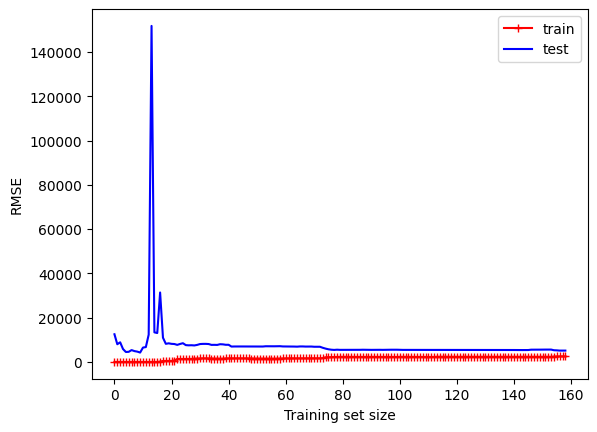

In [53]:
def plot_learning_curves(model, X, y):
    train_errors, test_errors = [], []

    for m in range(1, len(X)):
        X_subset = X[:m]
        y_subset = y[:m]
        model.fit(X_subset, y_subset)
        y_train_pred = model.predict(X_subset)
        y_test_pred = model.predict(X_test)
        train_errors.append(mean_squared_error(y_subset, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    plt.plot(np.sqrt(train_errors), "r-+", label="train")
    plt.plot(np.sqrt(test_errors), "b-", label="test")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

plot_learning_curves(lr_model, X_train, y_train)


### Adress overfitting with ridge regression 

In [54]:
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r_squared_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r_squared_ridge:.2f}")


Ridge Regression Model:
Mean Squared Error: 26699284.94
R-squared: 0.78


In [55]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

y_pred_best_ridge = best_ridge_model.predict(X_test)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r_squared_best_ridge = r2_score(y_test, y_pred_best_ridge)

print("Best Ridge Regression Model after Grid Search:")
print(f"Best alpha: {best_alpha}")
print(f"Mean Squared Error: {mse_best_ridge:.2f}")
print(f"R-squared: {r_squared_best_ridge:.2f}")


Best Ridge Regression Model after Grid Search:
Best alpha: 10
Mean Squared Error: 26647973.11
R-squared: 0.78
